## House Price Prediction

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [71]:
df.shape

(13320, 9)

In [72]:
#df.groupby('area_type')['area_type'].agg('count')  
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Removing Columns Which Are Not Required

In [81]:
df1=df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Checking For Nan Values

In [75]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

* The missing values can be handled in two ways for this data set.

* One is removing the Nan values and another way of handling Nan values is filling the Nan value with median of values of bath column.

* As the data set consists of 13320 rows , we can just remove the Nan values, as 73 rows is compartively very less values. We can stil achieve good resuts after removing the nan values.

In [82]:
df2=df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [77]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Analysing Size Column

* From the size column we can see that data values as 3BHK and 4 bedroom. To understand the datas in size column in a better way we can use the unique function which will show all the unique values in the particular column.

In [78]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Creating A New Column BHK 

* The size column is consists of string values split the string values with space in two values and take first value(0 represents the first value before the space) and convert it into a integer.

In [84]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-84-a57487b7ca79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [85]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [86]:
df2[df2.BHK>10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


### Exploring Total Square Feet Column

* There cant be 11 bedrooms in 1200 squarefeet house and 19 beedrooms in 2000 square feet house.

In [87]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

* From total square feet column we can notice that some values ae in a range of values. to over come this situation we can take the avergae of those range values.

* To determine the variation in the total square feet column. In order to do that we can detect whether the value is float or not.

In [88]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

* So the above code will convert the values in the total square feet column into float. the values in range will passed through except block of the code.

In [89]:
df2[df2['total_sqft']. apply(is_float)] # shows the values which are only float

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [90]:
df2[~df2['total_sqft']. apply(is_float)].head(10) # ~ Negate  function shows the values which are only in range

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


* We can see that the above total_sqft column consists of range values and values with different units.

* One way of handling those values with different unit is to convert them to sqfts. For now lets ingnore those data values.

* The range values can be handled taking average value of the range value.

In [91]:
def convert_sqft(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

* The above code will calculate the average value from the range and if its not a range of values it prints the float value. 

In [92]:
convert_sqft('2100 - 2850')

2475.0

In [93]:
df3=df2.copy()
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [94]:
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft)
df2.head(10)

<ipython-input-94-e4825fc15946>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(convert_sqft)


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


### Creating A New Feature 

* Creating a new which can be helpful for outlier detection and removal.

In [97]:
df3=df2.copy()
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [98]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df3.location.unique())

1304

* As there are 1304 unique locations which is big number. Usually text numbers are converted into dummy variable to solve the problem. Here as the number is too big, we cant use dummy variables.

* Here using using dummy variable will lead too many features or columns.This is called dimensionality curse.

* To over come dimesioality curse. There are many tehniques used to reduce the dimensions. One of the very effective technique is other category. 

In [99]:
df3.location=df3.location.apply(lambda x: x.strip()) ## This will remove extra space in the data of the location column.

location_count=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [100]:
len(location_count[location_count<=10])

1052

In [101]:
location_count_less_than_10=location_count[location_count<=10]
location_count_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [102]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_count_less_than_10 else x)
len(df3.location.unique())

242

In [103]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Detection And Removal

* Outliers are the data points which represents extreme variations in our data sets even though they are valid. It best to remove them from dataset or else it may create some issues later on.

* We can apply different techniques to detect and remove outliers. These techniques are either use standard deviation or by using Domain Knowledge.

* In real estate domain, whe you have 2 bedroom apartment it cant be in 500sqft in total area.

* Now we have create a thershold value for sqft for a bedroom in a house.

* Lets consider minimum space for a bedroom in a house is 300sqft. Any house having less that 300sqft for a bedroom are outliers.

In [104]:
df4=df3[~((df3.total_sqft/df3.BHK) < 300)] # Using Negate function to remove the houses which has bedrooms size less than 300sqft
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Price Per Square Feet

In [105]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

* We can see that the minimum value is 267 per sqft. Which is not possible in a city like bengluru. 

* And also the maximum value is 176470 per sqft which may be possible based on prime location.

* As we are buliding a generic model it makes sense to remove extreme cases.

In [106]:
def pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<(m+sd))]
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [107]:
df5=pps_outliers(df4)
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### Visulaization of Property Price of Bedrooms

In [108]:
import matplotlib

def plot_scatter(df, location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color='red', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Location')
    plt.legend()

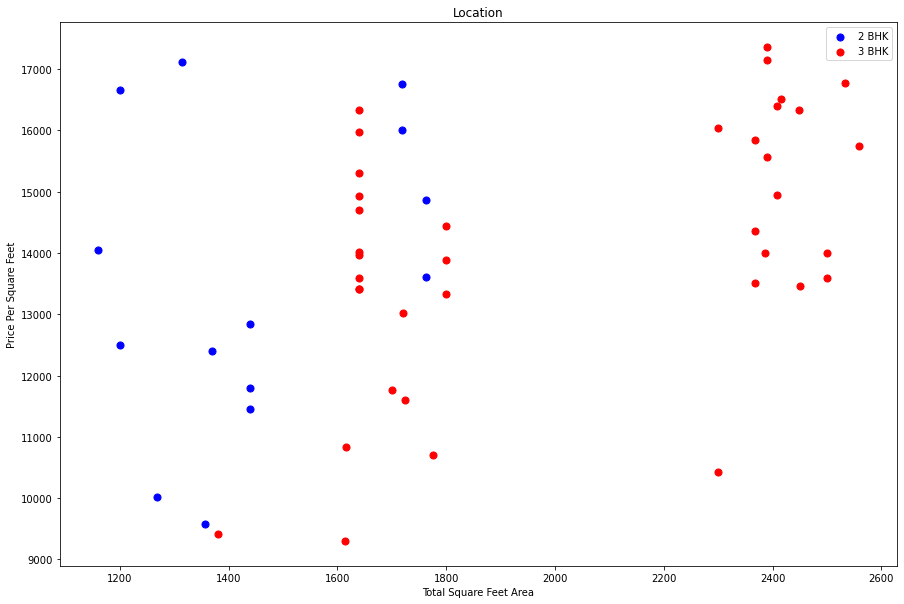

In [109]:
plot_scatter(df5, 'Rajaji Nagar')

* Here we can see that some houses with 2bhk has greater price than the 3bhk house of same tatol square feet area and located in the same location. 

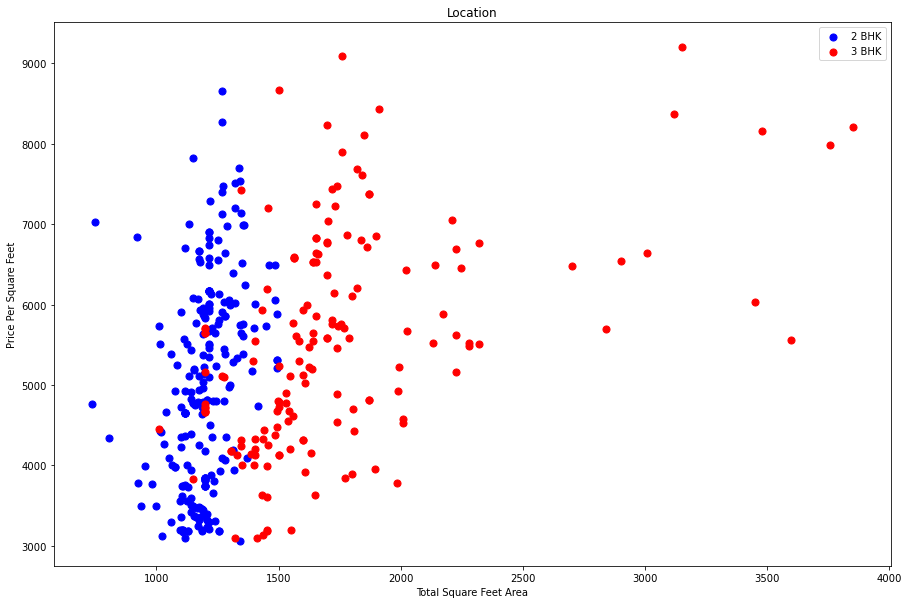

In [110]:
plot_scatter(df5, 'Whitefield')

* In other locations also we can see similar problem. We have to further clean and remove the outliers from the dataset. 

In [111]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft), 
                'std': np.std(bhk_df.price_per_sqft), 
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:  # Here if the stats vlaue is same for more that 5 counts that values is takes and other values are negelected.
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

**if stats and stats['count']>5:**
* It checks if there is dictionary present ( we didn't have for 1 bedroom group ) because None value will throw error. It also checks if it has more than 5 values or not. Because we cannot decide to discard something without comparing it with substantial data values.


**exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)**
* This will finally store the index of the current bedroom group's element if it is lower than the previous bedroom's mean value..

In [112]:
df6 = remove_bhk_outliers(df5)
df6.head(20).sort_values(by=['BHK', 'price_per_sqft'], ascending=True)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
16,1st Phase JP Nagar,1 BHK,840.0,2.0,50.0,1,5952.380952
21,1st Phase JP Nagar,2 BHK,1394.0,2.0,85.0,2,6097.560976
20,1st Phase JP Nagar,2 BHK,1200.0,2.0,86.0,2,7166.666667
13,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148
19,1st Phase JP Nagar,2 BHK,1180.0,2.0,88.5,2,7500.000000
14,1st Phase JP Nagar,2 BHK,1077.0,2.0,93.0,2,8635.097493
15,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,180.0,2,11494.252874
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
17,1st Phase JP Nagar,3 BHK,1590.0,3.0,131.0,3,8238.993711
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667


In [113]:
df6.shape

(7329, 7)

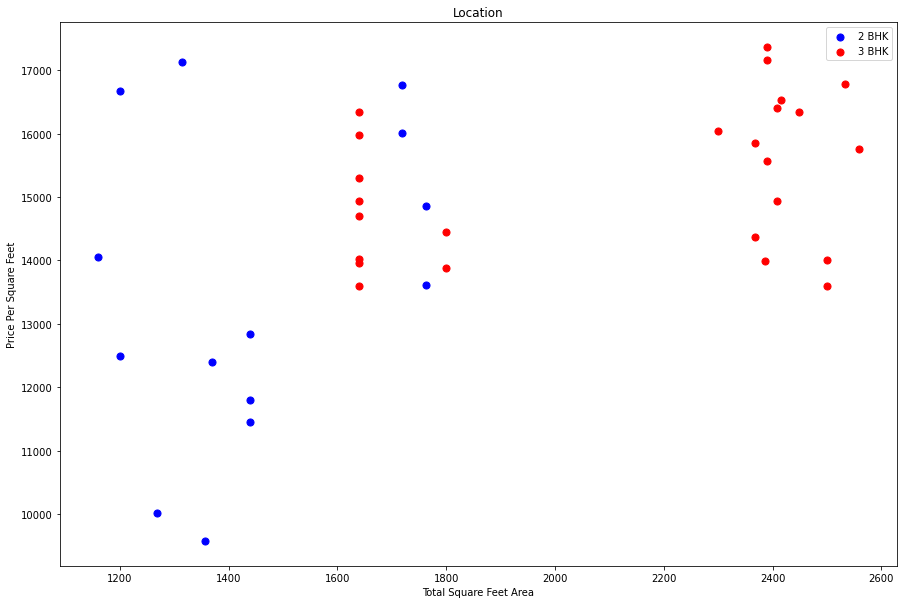

In [114]:
plot_scatter(df6, 'Rajaji Nagar')

* From the above chart we can see that the house with 3bhk whose price is less than 2bhk in the same location are removed to a considerable extend.

Text(0, 0.5, 'Count')

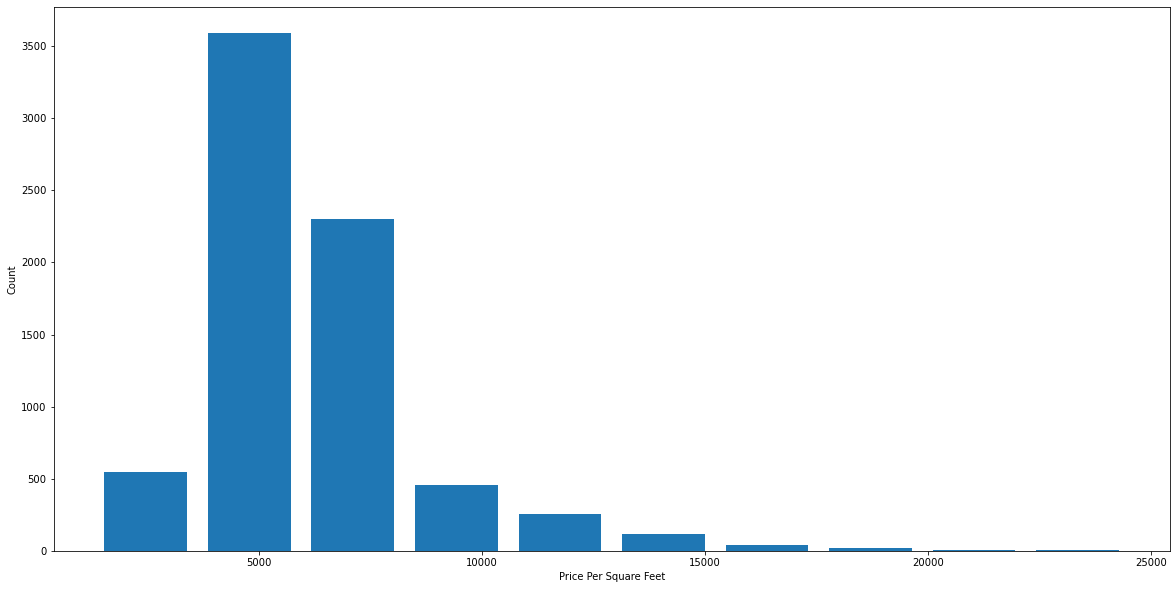

In [115]:
matplotlib.rcParams['figure.figsize']=(20, 10)
plt.hist(df6.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

 ### Analysing Bath Column

In [116]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [117]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


* Let consider any house having bathroom greater than Bedroom+2 is a outlier.

Text(0, 0.5, 'Count')

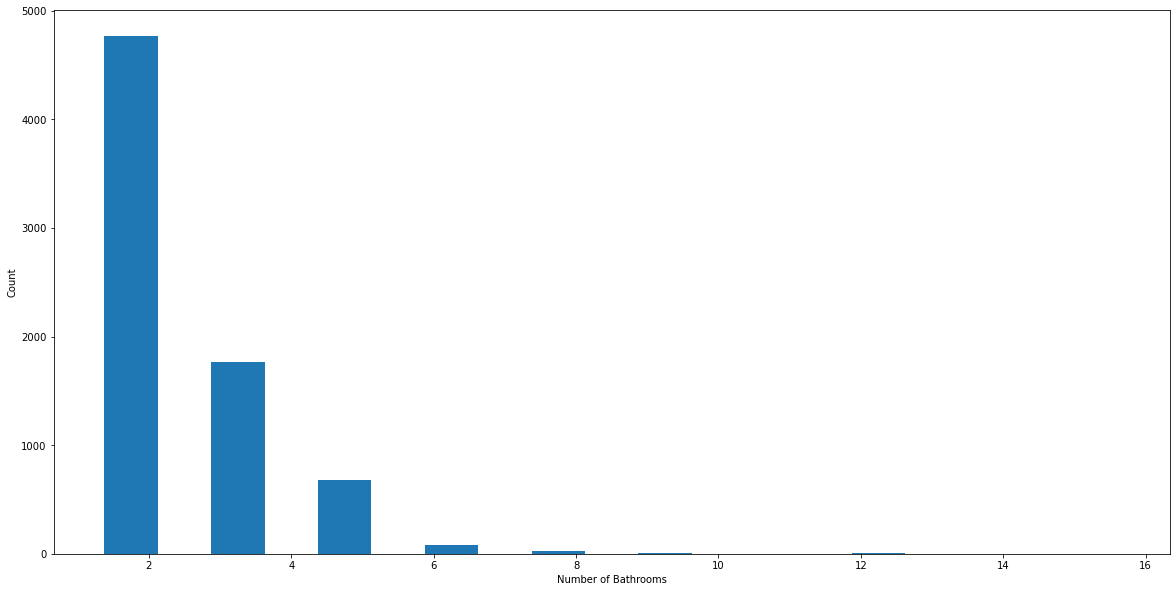

In [118]:
plt.hist(df6.bath, rwidth=0.5)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [119]:
df6[df6.bath>df6.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [120]:
df7=df6[df6.bath<df6.BHK+2]
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [121]:
df7.shape

(7251, 7)

In [122]:
df8=df7.drop(['size','price_per_sqft'], axis='columns')
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [123]:
dummies=pd.get_dummies(df8.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df9=pd.concat([df8, dummies.drop('other', axis='columns')], axis='columns')
df9.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df10=df9.drop('location', axis='columns')
df10.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
x=df10.drop(['price'], axis='columns')
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=10)

In [130]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [131]:
model.predict(x_test)

array([70.47896311, 33.09312356, 36.00433051, ..., 29.45805298,
       58.43306285, 68.60105208])

In [132]:
model.score(x_test, y_test)

0.8452277697874278

### K Fold Cross Validation

In [133]:
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [134]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), x, y, cv=ss)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [136]:
def bestmodel_using_gridsearchcv(x, y):
    algo = {
        'linear_regression':{
            'model': LinearRegression(), 
            'parameter':{
                'normalize':[True, False]
            }
        }, 
        'lasso':{
            'model':Lasso(), 
            'parameter':{
                'alpha':[1, 2],
                'selection':['random', 'cyclic']
            }
        }, 
        'decision_tree':{
            'model':DecisionTreeRegressor(), 
            'parameter':{
                'criterion':['mse', 'friedman_mse'], 
                'splitter':['best', 'random']
            }
        }
    }
    score=[]
    ss=ShuffleSplit(n_splits=5, train_size=0.8, random_state=0)
    for alg_name, config in algo.items():
        gs=GridSearchCV(config['model'], config['parameter'], cv=ss, return_train_score=True)
        gs.fit(x, y)
        score.append({
            'model': alg_name, 
            'best_score':gs.best_score_, 
            'best_params':gs.best_params_
        })

    return pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])

In [137]:
bestmodel_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687431,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.722137,"{'criterion': 'mse', 'splitter': 'random'}"


In [138]:
def predict_price(location, sqft, bath, bhk):
    loc_index=np.where(x.columns==location)[0][0]
    
    z=np.zeros(len(x.columns))
    z[0]=sqft
    z[1]=bath
    z[2]=bhk
    if loc_index >= 0:
        z[loc_index]=1
    
    return model.predict([z])[0]

In [139]:
predict_price('Indira Nagar', 1000, 2, 2)

181.27815484007027

In [140]:
predict_price('Rajaji Nagar', 2000, 2, 2)

298.556167155067

In [141]:
import pickle
with open('House_price_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [142]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))